# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,  mean_squared_error
from plotnine import *


KeyboardInterrupt: 

In [3]:
print(penguins)

pen_dumb = pd.get_dummies(penguins)

pen_dumb

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


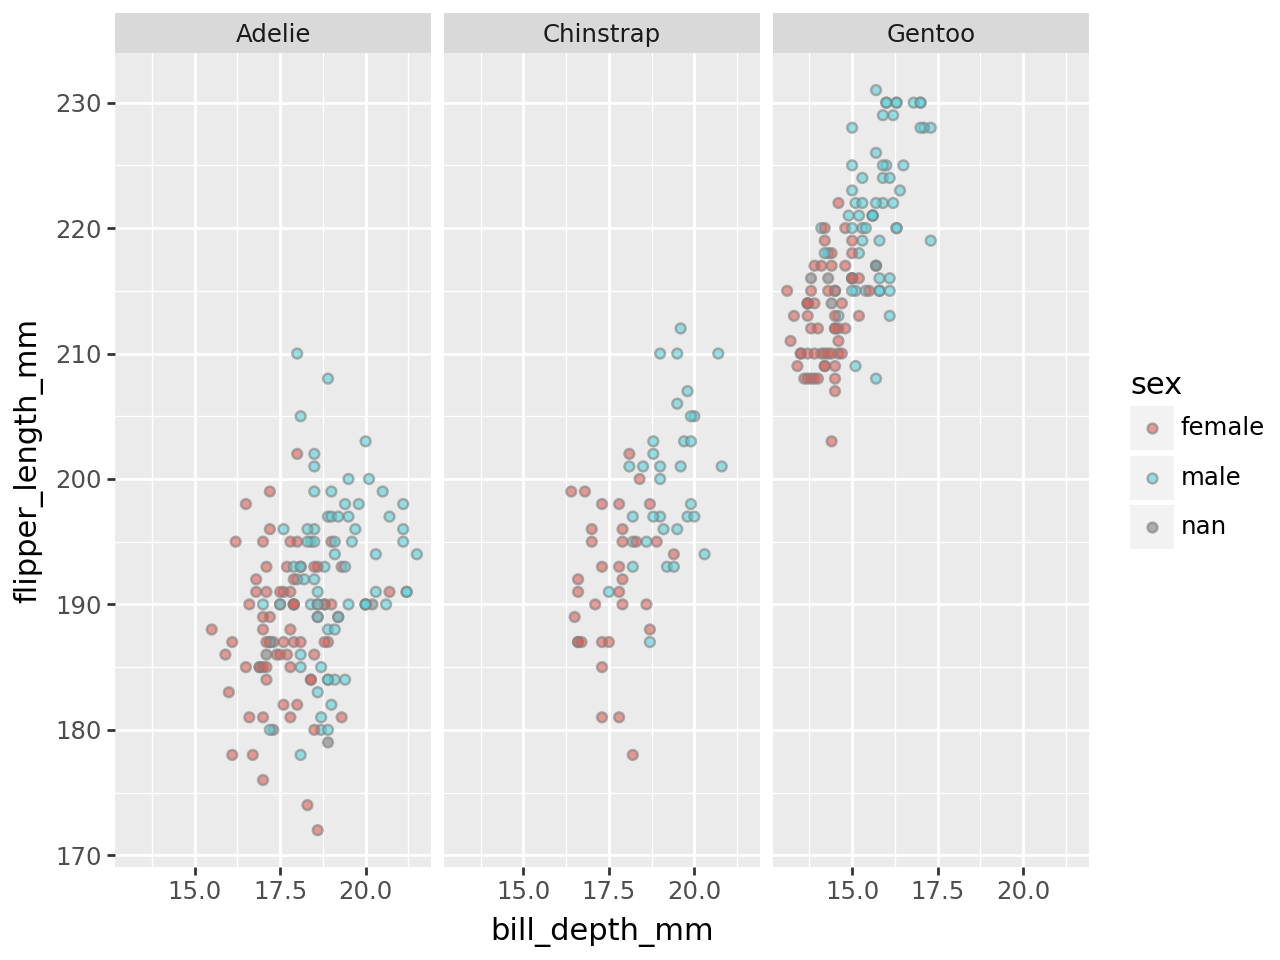

In [12]:
# Code Here
(
    ggplot(penguins, aes(x = 'bill_depth_mm', y = 'flipper_length_mm', fill = 'sex'))
    + geom_point(alpha=0.6, color='gray')
    + facet_wrap('species')
)

In [18]:
pen_dumb = pen_dumb.dropna()

In [28]:


X_train_idx, X_test_idx = train_test_split(
    pen_dumb.index, test_size=0.2, random_state=42
)

y = pen_dumb['bill_depth_mm']

X_train_1 = pen_dumb.loc[X_train_idx, ['bill_length_mm', 'species_Chinstrap', 'species_Gentoo']]
X_test_1  = pen_dumb.loc[X_test_idx,  ['bill_length_mm', 'species_Chinstrap', 'species_Gentoo']]

X_train_2 = pen_dumb.loc[X_train_idx, ['body_mass_g','sex_male']]
X_test_2  = pen_dumb.loc[X_test_idx,  ['body_mass_g','sex_male']]

X_train_3 = pen_dumb.loc[X_train_idx, ['body_mass_g','sex_male', 'species_Chinstrap', 'species_Gentoo']]
X_test_3  = pen_dumb.loc[X_test_idx,  ['body_mass_g','sex_male', 'species_Chinstrap', 'species_Gentoo']]

X_train_4 = pen_dumb.loc[X_train_idx, ['bill_length_mm', 'species_Chinstrap', 'species_Gentoo','body_mass_g','sex_male']]
X_test_4  = pen_dumb.loc[X_test_idx,  ['bill_length_mm', 'species_Chinstrap', 'species_Gentoo','body_mass_g','sex_male']]

y_train = y.loc[X_train_idx]
y_test  = y.loc[X_test_idx]

model1 = LinearRegression().fit(X_train_1, y_train)
model2  = LinearRegression().fit(X_train_2,  y_train)
model3  = LinearRegression().fit(X_train_3,  y_train)
model4 = LinearRegression().fit(X_train_4,  y_train)

yhat_1 = model1.predict(X_test_1)
yhat_2  = model2.predict(X_test_2)
yhat_3  = model3.predict(X_test_3)
yhat_4  = model4.predict(X_test_4)

print("R² (model1):   ", r2_score(y_test, yhat_1))
print("MSE (model1):  ", mean_squared_error(y_test, yhat_1))

print("R² (Model2):", r2_score(y_test, yhat_2))
print("MSE (MOdel 2):", mean_squared_error(y_test, yhat_2))

print("R² (Model 3):    ", r2_score(y_test, yhat_3))
print("MSE (Model 3):   ", mean_squared_error(y_test, yhat_3))

print("R² (Model 4):     ", r2_score(y_test, yhat_4))
print("MSE (Model 4):    ", mean_squared_error(y_test, yhat_4))

predictions = pd.Series(yhat_1, name = 'model1pred')
predictions = predictions.to_frame()
predictions['model2pred'] = yhat_2
predictions['model3pred'] = yhat_3
predictions['model4pred'] = yhat_4

predictions['actual'] = y_test.values

predictions



R² (model1):    0.8132752057949626
MSE (model1):   0.7752040043727174
R² (Model2): 0.6711989626638115
MSE (MOdel 2): 1.36504571805837
R² (Model 3):     0.8652443573756128
MSE (Model 3):    0.5594496125647659
R² (Model 4):      0.8650851760190983
MSE (Model 4):     0.5601104676243032


,model1pred,model2pred,model3pred,model4pred,actual
0,14.201137,15.075858,14.133433,14.022762,14.4
1,18.040851,19.318204,18.852563,18.704992,20.5
2,18.493116,16.399762,18.038573,18.135387,20.7
3,19.377982,18.136147,19.365624,19.528994,19.7
4,18.866726,18.325276,19.283534,19.315008,18.3
...,...,...,...,...,...
64,14.810711,15.454116,13.969253,14.045723,14.5
65,19.712264,18.608970,19.160399,19.439529,18.9
66,18.748744,16.778020,17.874393,18.060555,16.8
67,19.063363,17.947018,19.447714,19.514797,20.7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


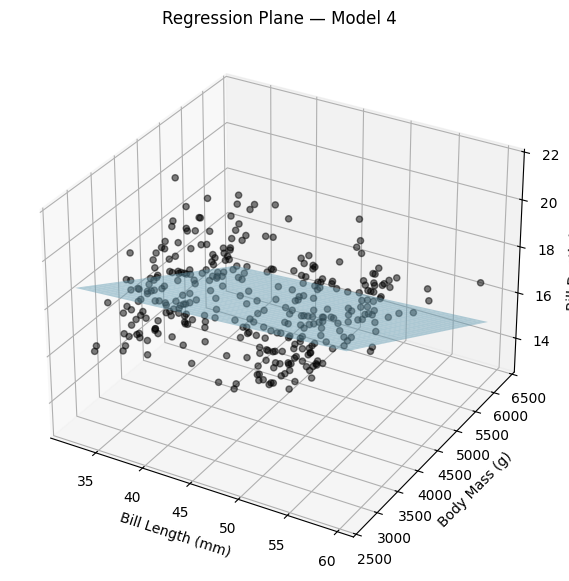

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the continuous predictors
X = pen_dumb[['bill_length_mm', 'body_mass_g']]
y = pen_dumb['bill_depth_mm']

# Fit the model (if not already)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

# Create a grid of values
x_surf, y_surf = np.meshgrid(
    np.linspace(X['bill_length_mm'].min(), X['bill_length_mm'].max(), 30),
    np.linspace(X['body_mass_g'].min(), X['body_mass_g'].max(), 30)
)
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['bill_length_mm'], X['body_mass_g'], y, color='black', alpha=0.5)
ax.plot_surface(x_surf, y_surf, z_pred, color='skyblue', alpha=0.5)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_zlabel('Bill Depth (mm)')
plt.title('Regression Plane — Model 4')
plt.show()





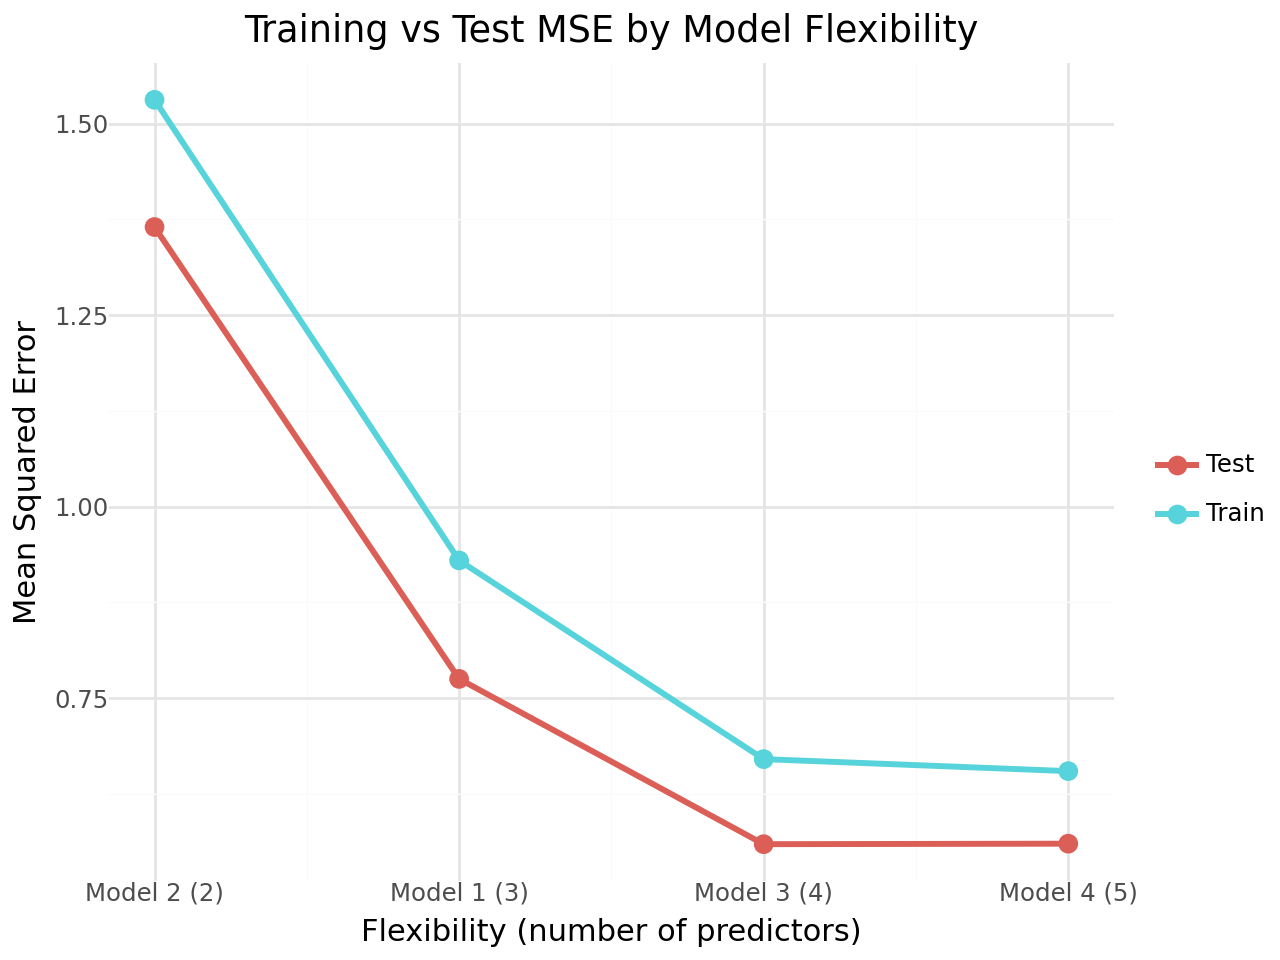

In [37]:

from plotnine import *

rows = []
models = [
    ("Model 2", model2, X_train_2, X_test_2),
    ("Model 1", model1, X_train_1, X_test_1),
    ("Model 3", model3, X_train_3, X_test_3),
    ("Model 4", model4, X_train_4, X_test_4),
]

for name, mdl, Xtr, Xte in models:
    k = Xtr.shape[1]
    yhat_tr = mdl.predict(Xtr)
    mse_tr = mean_squared_error(y_train, yhat_tr)
    rows.append({"model": name, "flexibility": k, "split": "Train", "mse": mse_tr})

    yhat_te = mdl.predict(Xte)
    mse_te = mean_squared_error(y_test, yhat_te)
    rows.append({"model": name, "flexibility": k, "split": "Test", "mse": mse_te})

df = pd.DataFrame(rows).sort_values(["flexibility","split"])

(
    ggplot(df, aes(x="flexibility", y="mse", color="split", group="split"))
    + geom_line(size=1.2)
    + geom_point(size=3)
    + scale_x_continuous(
        breaks=sorted(df["flexibility"].unique()),
        labels=[f"{m} ({k})" for m,k in df.drop_duplicates("flexibility")[["model","flexibility"]].sort_values("flexibility").values]
    )
    + labs(
        title="Training vs Test MSE by Model Flexibility",
        x="Flexibility (number of predictors)",
        y="Mean Squared Error",
        color=""
    )
    + theme_minimal()
)



According to the metrics and the graph above my model 3 and model 4 are almost identical in terms of MSE and R^2 values. Because model 3 has less predictors but still gets the same prediction power, I think it is the best option.